Imports libraries and data

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = pd.read_csv("data.csv")


Produces a linear regression model from data

In [37]:
def linear_regression_model(data):
    m = 1
    b = 0
    def funct(x):
        return x * m + b
    inputs = data["x"]
    actuals = data["y"]
    learning_rate = 0.1 / max(inputs)
    for iter in range(1000):
        for i in range(len(inputs)):
            error = actuals[i] - funct(inputs[i])
            m += learning_rate * inputs[i] * error
            b += learning_rate * error
    print(f"Function: {m}x + {b}")
    return [m,b]



Graphs the data and line of best fit

Function: 1.0x + 0.0


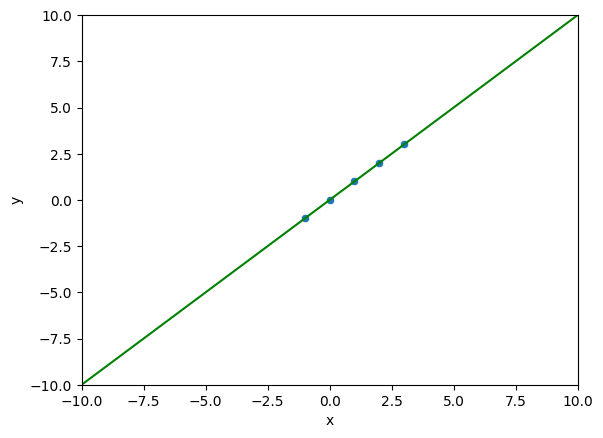

In [38]:
terms = linear_regression_model(data)
m = terms[0]
b = terms[1]

x = np.linspace(-10, 10, 100)
y = m * x + b

line_data = pd.DataFrame({'x': x, 'y': y})
sns.lineplot(data=line_data, x="x", y="y", color="green")
sns.scatterplot(data=data, x="x", y="y")
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

Produces a quadratic regression model

In [39]:
def quadratic_regression_model(data):
    a = 1
    b = 0
    c = 0

    def func(x):
        return a * (x ** 2) + b * x + c
    
    inputs = data["x"]
    actuals = data["y"]
    learning_rate = 0.1 / max(inputs)
    for iter in range(1000):
        for i in range(len(inputs)):
            error = actuals[i] - func(inputs[i])
            a += learning_rate * (inputs[i] ** 2) * error
            b += learning_rate * inputs[i] * error
            c += learning_rate * error
    print(f"Function {a}x^2 + {b}x + {c}")
    return [a,b,c]

Graphs a quadratic best fit model

Function 1.3578022430765491e-16x^2 + 0.9999999999999996x + 7.773509133269565e-17


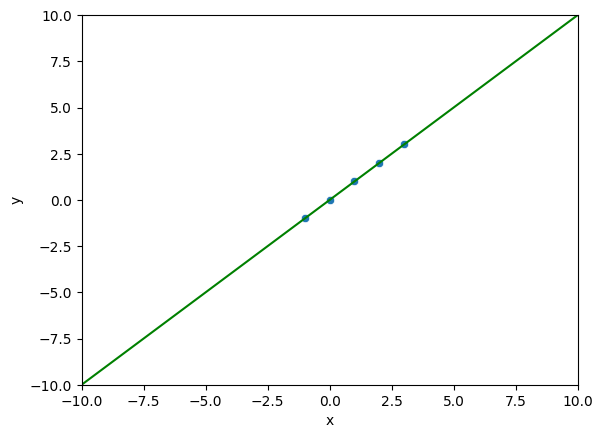

In [40]:
terms = quadratic_regression_model(data)
a = terms[0]
b = terms[1]
c = terms[2]

x = np.linspace(-10, 10, 100)
y = a * (x ** 2) + b * x + c

quad_data = pd.DataFrame({'x': x, 'y': y})
sns.lineplot(data=quad_data, x="x", y="y", color="green")
sns.scatterplot(data=data, x="x", y="y")
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

Produces and exponential best fit model

In [41]:
def exponential_regression_model(data):
    a = 1.0
    b = 2.0

    def func(x):
        return a * (b ** x)

    inputs = data["x"]
    actuals = data["y"]
    learning_rate = 0.001 / max(inputs)
    for iter in range(10000):
        for i in range(len(inputs)):
            error = actuals[i] - func(inputs[i])
            a0 = a
            a += (b ** inputs[i]) * learning_rate * error
            b += a0 * ((b ** (inputs[i] - 1)) * inputs[i]) * learning_rate * error
    
    print(f"function: {a} * ({b})^x")
    return [a,b]

Graphs the exponential best fit model

function: 0.34780487781184266 * (2.092222876152426)^x


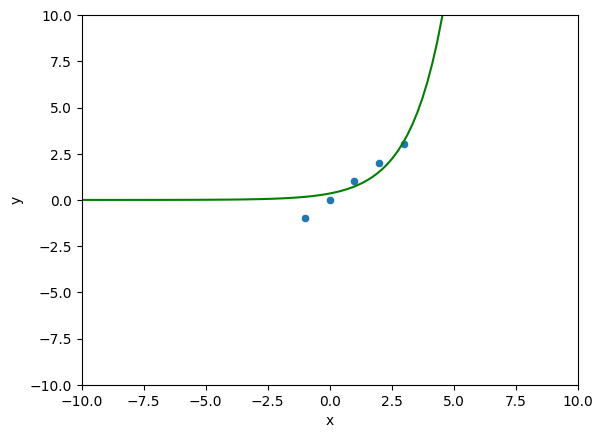

In [42]:
terms = exponential_regression_model(data)
a = terms[0]
b = terms[1]

x = np.linspace(-10, 10, 100)
y = a * (b ** x)

exp_data = pd.DataFrame({"x": x, "y": y})
sns.lineplot(data=exp_data, x="x", y="y", color="green")
sns.scatterplot(data=data, x="x", y="y")
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()